In [9]:
from tensorflow import keras
from keras import layers
import numpy as np

from matplotlib import pyplot as plt

In [10]:
# Load MNIST Data
(X_train, y_train), (X_val, y_val) = keras.datasets.mnist.load_data()

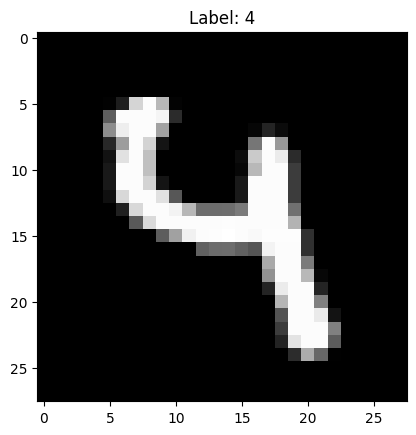

In [11]:
#Display a random label and its image
random_index = np.random.randint(0, len(X_train))
r_image, r_label = X_train[random_index], y_train[random_index]

plt.imshow(r_image, cmap='gray')
plt.title(f"Label: {r_label}")
plt.show()

In [12]:
#normalize
X_train = keras.utils.normalize(X_train, axis=1)
X_val = keras.utils.normalize(X_val, axis=1)

In [13]:
model_1 = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\Documents\Python projects\MNIST-Sandbox\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model_2 = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\Documents\Python projects\MNIST-Sandbox\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8682 - loss: 0.4716 - val_accuracy: 0.9613 - val_loss: 0.1239
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1084 - val_accuracy: 0.9665 - val_loss: 0.1053
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0698 - val_accuracy: 0.9668 - val_loss: 0.1063
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9843 - loss: 0.0498 - val_accuracy: 0.9713 - val_loss: 0.0944
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0379 - val_accuracy: 0.9714 - val_loss: 0.0945


In [16]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8989 - loss: 0.3354 - val_accuracy: 0.9840 - val_loss: 0.0511
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9813 - loss: 0.0566 - val_accuracy: 0.9840 - val_loss: 0.0483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9881 - loss: 0.0370 - val_accuracy: 0.9881 - val_loss: 0.0388
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9929 - loss: 0.0227 - val_accuracy: 0.9910 - val_loss: 0.0290
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 0.9903 - val_loss: 0.0317


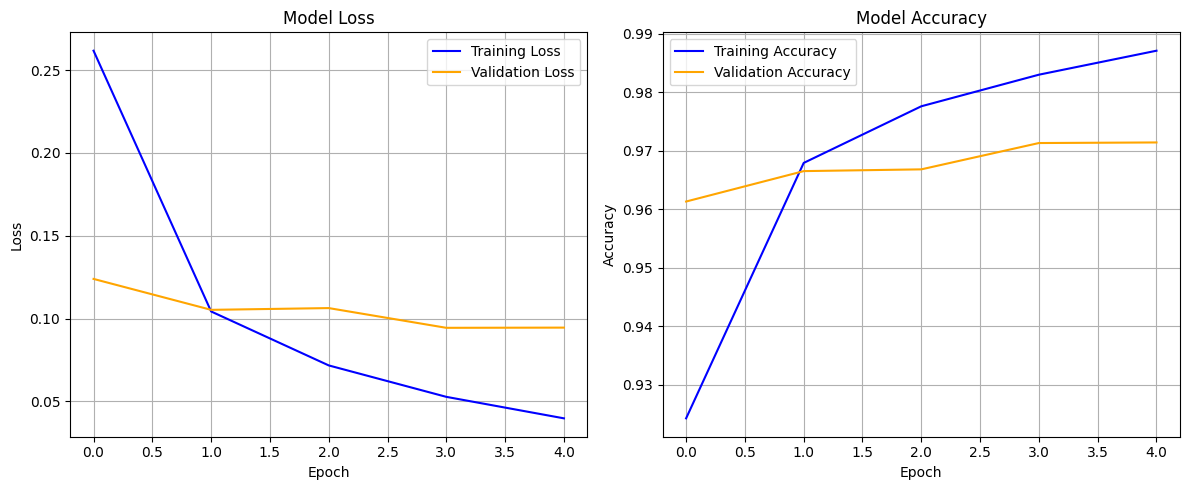

In [17]:
# Plotting loss and val_loss
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss', color='blue')
plt.plot(history_1.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

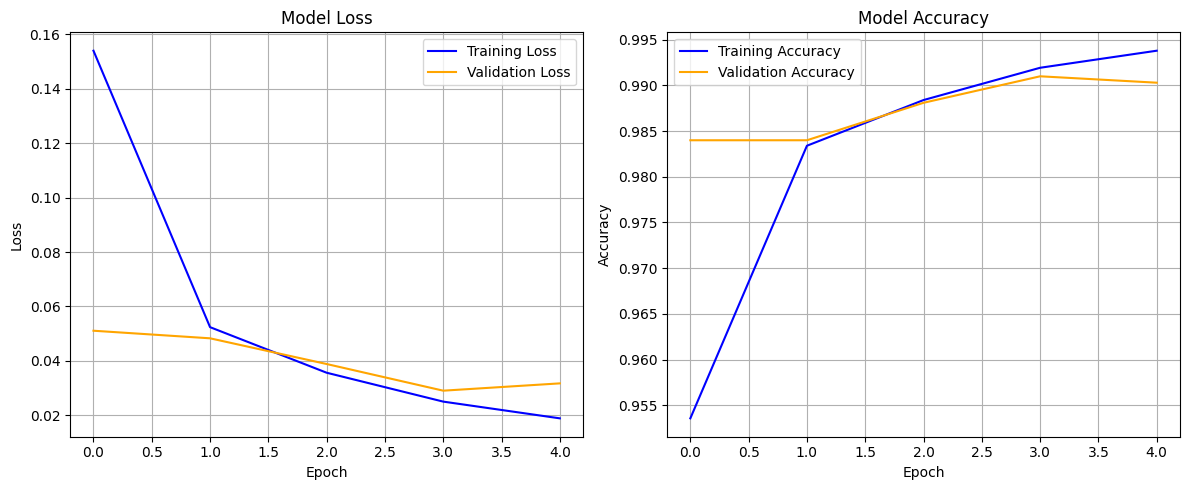

In [18]:
# Plotting loss and val_loss
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_2.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [20]:
model_2.save('mnist_model.keras')